In [2]:
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

mkdir: cannot create directory ‘cuchillos’: File exists
mkdir: cannot create directory ‘cucharas’: File exists
mkdir: cannot create directory ‘tenedores’: File exists


In [3]:
#entrar en cada carpeta y descomprimir el archivo zip

%cd cuchillos
!unzip cuchillos.zip

%cd ../cucharas
!unzip cuchara.zip

%cd ../tenedores
!unzip tenedores.zip

%cd ..


/content/cuchillos
Archive:  cuchillos.zip
  inflating: cuchillos/000022902-006_001_700x700.jpg  
  inflating: cuchillos/0011165baaf49da93284d79b3d363828.jpg  
  inflating: cuchillos/0137501-2.jpg  
  inflating: cuchillos/097a7a9127cd6d1562913aabf8cd2733_1400x.jpg  
  inflating: cuchillos/1061631620.jpg  
  inflating: cuchillos/1063771577.jpg  
  inflating: cuchillos/1063780126.jpg  
  inflating: cuchillos/1063971029.jpg  
  inflating: cuchillos/1209324-1.png  
  inflating: cuchillos/158312507801630.jpg  
  inflating: cuchillos/16430223514485.jpg  
  inflating: cuchillos/18530-081.jpg  
  inflating: cuchillos/201300-Cuchillo-Mondador.jpg  
  inflating: cuchillos/203046_prod-Cuchillo-chef-12.jpg  
  inflating: cuchillos/203185_prod-c-Cuchillo-bistecero-16-rojo.jpg  
  inflating: cuchillos/20536_1.jpg   
  inflating: cuchillos/24499812PNM001B.jpg  
  inflating: cuchillos/24609046PNM001B.jpg  
  inflating: cuchillos/3002.png      
  inflating: cuchillos/32200600.jpg  
  inflating: cuchill

In [4]:
!rm -rf /content/cucharas/cuchara.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip

In [5]:
!ls /content/cucharas/cuchara | wc -l #349
!ls /content/cuchillos/cuchillos | wc -l #306
!ls /content/tenedores/tenedores | wc -l #308

349
306
308


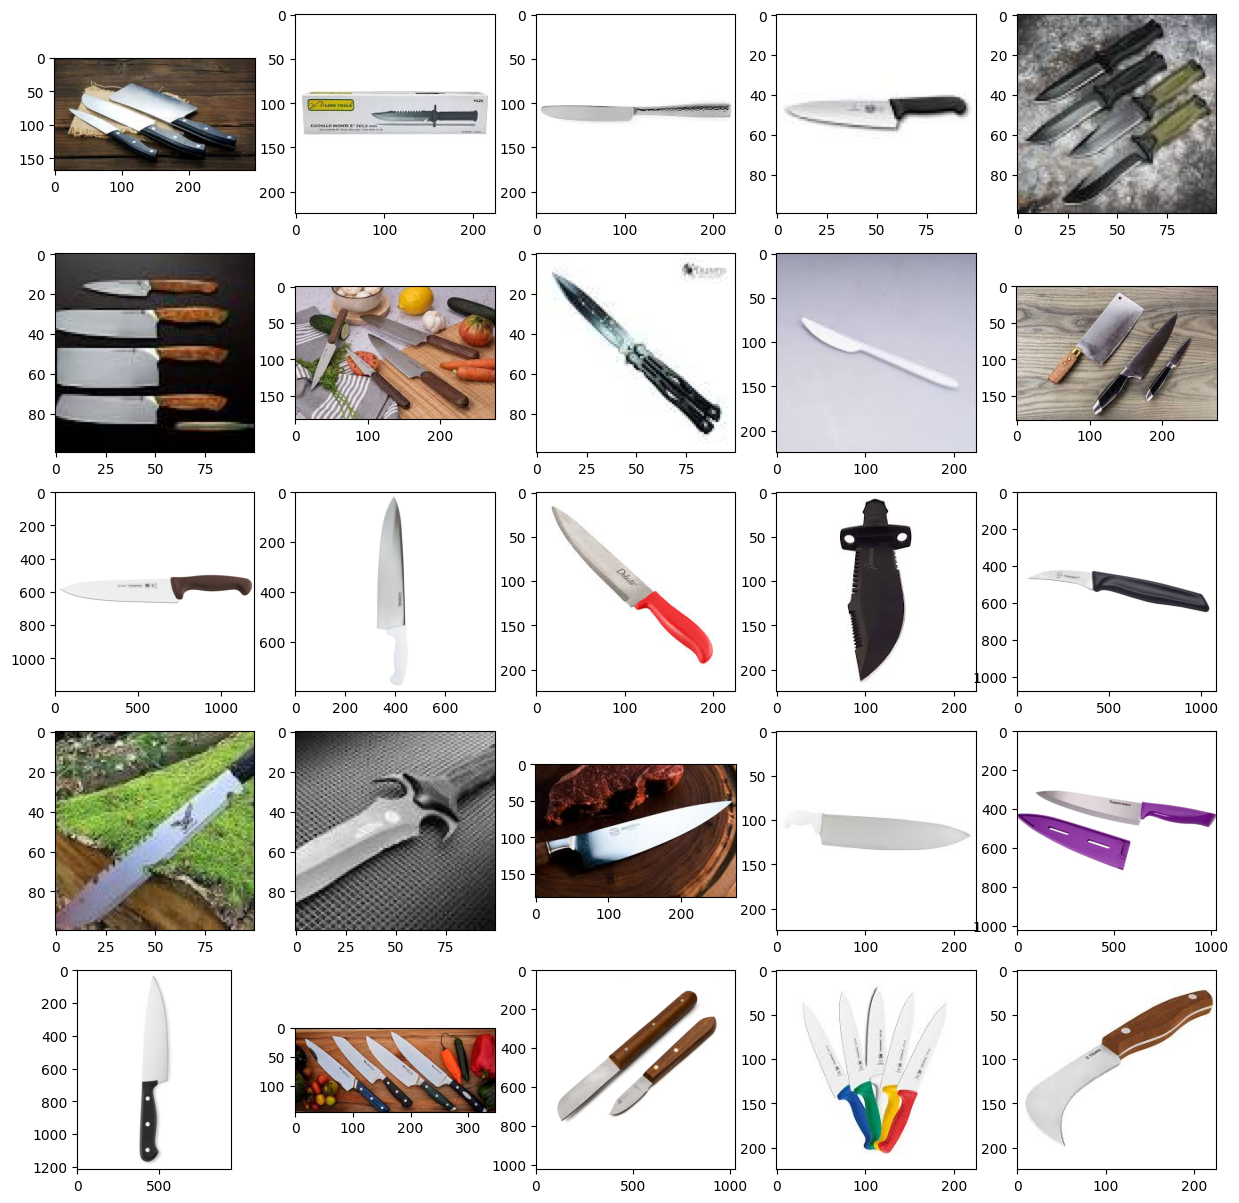

In [6]:
#mostrar imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/cuchillos/cuchillos'
images = os.listdir(carpeta)

for i, nombreimg in enumerate(images[:25]):
  plt.subplot(5,5, i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [7]:
#crear carpetas para hacer el set de datos
!mkdir dataset
!mkdir dataset/cuchillos
!mkdir dataset/tenedores
!mkdir dataset/cuchara

In [27]:
#copiar imagenes de las carpetas al dataset
#limitar para que todos tengan la misma cantidad de imagenes
#306 el numero menor de imagenes que sbuni

import shutil
carpeta_fuente_cuchillo = '/content/cuchillos/cuchillos'
carpeta_destino_cuchillo = '/content/dataset/cuchillos'

carpeta_fuente_cuchara = '/content/cucharas/cuchara'
carpeta_destino_cuchara = '/content/dataset/cuchara'

carpeta_fuente_tenedor = '/content/tenedores/tenedores'
carpeta_destino_tenedor = '/content/dataset/tenedores'

imagenes = os.listdir(carpeta_fuente_cuchillo)
imagenes_cuchara = os.listdir(carpeta_fuente_cuchara)
imagenes_tenedor = os.listdir(carpeta_fuente_tenedor)

for i, nombreimg in enumerate(imagenes):
  if i < 306:
    shutil.copy(carpeta_fuente_cuchillo + '/' + nombreimg , carpeta_destino_cuchillo + '/' + nombreimg)

for i, nombreimg in enumerate(imagenes_cuchara):
  if i < 306:
    shutil.copy(carpeta_fuente_cuchara + '/' + nombreimg , carpeta_destino_cuchara + '/' + nombreimg)

for i, nombreimg in enumerate(imagenes_tenedor):
  if i < 306:
    shutil.copy(carpeta_fuente_tenedor + '/' + nombreimg , carpeta_destino_tenedor + '/' + nombreimg )

In [28]:
!ls /content/dataset/cuchara | wc -l
!ls /content/dataset/cuchillos | wc -l
!ls /content/dataset/tenedores | wc -l

306
306
306


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#creación del dataset generador
datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split   = 0.2 # para pruebas
)

#generador de sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224,),
    batch_size = 32, shuffle=True,
    subset='training'
)
data_gen_pruebas = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(224, 224,),
    batch_size = 32, shuffle=True,
    subset='validation'
)



Found 725 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


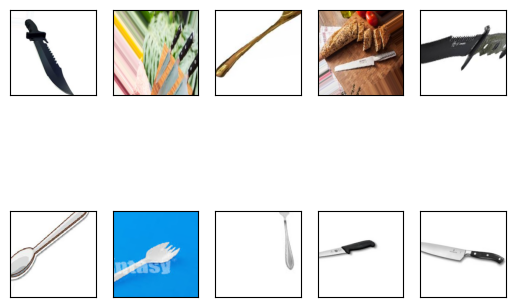

In [34]:
#imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [36]:
import tensorflow as tf
import tensorflow_hub as hubtf

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hubtf.KerasLayer(url, input_shape=(224, 224, 3))



In [37]:
#congelar parámetros para un mejor entrenamiento, ya que se pondrán mis propios parámetros de entrenamiento con el arduo trabajo que hizo google
mobilenetv2.trainable = False

In [39]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [40]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [41]:
#complar modelo
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [42]:
#entrenamiento
Epocas = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs = Epocas, batch_size = 32,
    validation_data= data_gen_pruebas
)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.8304 - accuracy: 0.6207

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


23/23 [==============================] - 46s 2s/step - loss: 0.8304 - accuracy: 0.6207 - val_loss: 0.5343 - val_accuracy: 0.8000
Epoch 2/50
23/23 [==============================] - 42s 2s/step - loss: 0.5162 - accuracy: 0.7779 - val_loss: 0.3652 - val_accuracy: 0.8611
Epoch 3/50
23/23 [==============================] - 39s 2s/step - loss: 0.4132 - accuracy: 0.8359 - val_loss: 0.2980 - val_accuracy: 0.9111
Epoch 4/50
23/23 [==============================] - 39s 2s/step - loss: 0.3831 - accuracy: 0.8524 - val_loss: 0.2689 - val_accuracy: 0.9056
Epoch 5/50
23/23 [==============================] - 39s 2s/step - loss: 0.3444 - accuracy: 0.8648 - val_loss: 0.2473 - val_accuracy: 0.9111
Epoch 6/50
23/23 [==============================] - 41s 2s/step - loss: 0.3598 - accuracy: 0.8634 - val_loss: 0.2628 - val_accuracy: 0.9111
Epoch 7/50
23/23 [==============================] - 40s 2s/step - loss: 0.3378 - accuracy: 0.8745 - val_loss: 0.2610 - val_accuracy: 0.9111
Epoch 8/50
23/23 [=============

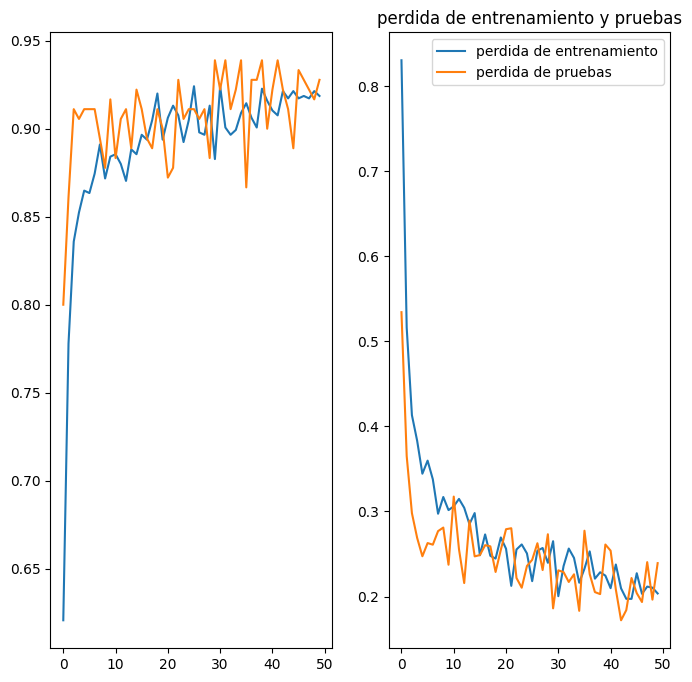

In [45]:
#graficas de presición
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Presicion entrenamiento')
plt.plot(rango_epocas, val_acc, label='Presicion pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label="perdida de entrenamiento")
plt.plot(rango_epocas, val_loss, label="perdida de pruebas")
plt.legend(loc='upper right')
plt.title('perdida de entrenamiento y pruebas')
plt.show()

In [56]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255  #normalizar

  img = cv2.resize(img, (224, 224))
  reshapedImg = img.reshape(-1, 224, 224, 3)
  prediccion = modelo.predict(reshapedImg)
  return np.argmax(prediccion[0], axis=-1)

#0 = cuchara, 1 cuchillo, 2=tenedor

url = "https://www.vianca.mx/wp-content/uploads/2021/02/203046_prod-Cuchillo-chef-12.jpg"
prediccion = categorizar(url)
print(prediccion)

1/1 [==============================] - 0s 75ms/step
1
